# Civilian Complaints Against NYPD Officers

Joshua Chuang, Kevin Bui


### Summary of Findings

#### Introduction

We will be using the free data set Civilian Complaints Against New York City Police Officers found on ProPublic Data Store. The dataset consists of "more than 12,000 civilan complaints filed against New York City police officers" from September 1985 to January 2020. Each data entry includes information about the officer and the complainant. It also includes details about the alleged misconduct, including the allegation, contact reason, and the conclusion of the CCRB. Having information about the officer and the complainant, including their genders, and the disposition of the cases, we can answer the question: "Are white officer vs. non-white complainant cases more likely to go against the complainant?".


#### Cleaning and EDA

We cleaned the data through several means. We first converted the month and year received and month and year closed to datatime objects. Using the datetime objects, we found the elapsed duration of each case. We also replaced missing and invalid entries with nan values. Some of these are missing as people often will refuse or skip answering questions related to personal information. We formated the gender columns to match, changing "M" and "F" values to "Male" and "Female". Lastly, we simplified the board_disposition column so that all the values of substantiated were the same.

In our EDA, we looked at the proportion of cases that were exonerated, substantiated, or unsubstantiated to create a bar plot by grouping the "disposition_simplified" column we created in our cleaning process. It seems that the majority of the conclusions of the complaints resulted in no action taken against the officer with unsubstantiated and exonerated making 75.115% of the conclusions. Only a small amount of the complaints result in the disciplining of the officer. The large proportion of unsubstantiated could be due to the uncooperation of the NYPD at times to provide evidence relating to the incident as stated in the readme file of the data.

We also created another bar plot to look at the average complainant time open for a case for each the complainant's ethnicities.

Lastly, we observed the proporition that each race was substantiated by grouping the complainant's ethnicies and aggregating the total substantiated divided by the total number of the complaintant for each respective ethnicity.


#### Assessment of Missingness

Complainant ethnicity, gender, and age make up the majority of the missing values in the dataset. This could be due to the complainant not wanting these values to affect the board disposition. For example, some values like being of "black" ethnicity could cause the decision to be less in favor of the complainant due to racial bias, causing some complainants to not disclose their ethnicity. This would make the missingness of these columns not missing at random (NMAR).

* We tested if the missingness of complainant_ethnicity is dependent on mos_gender. Using a permutation test and a significance value of 0.05, we found a p-value of 0.068. As a result, we conclude that complainant_ethnicity is not dependent on mos_gender.

* We tested if the missingness of complainant_ethnicity is dependent on allegation. Also using a permutation test and significance level of 0.05, we found a p-value of 0.0. As a result, we conclude that complainant_ethnicity is dependent on allegation and that complainant_ethnicity is MAR.

#### Hypothesis Test

We conducted a permutation test to answer the question: "Are white officer vs. non-white complainant cases more likely to go against the complainant?". In the test, we shuffled ethnicity of complainant and only looked at cases involving white officers. We established our null hypothesis as the complainant's ethnicity of being non-white vs white will not make the case more likely to be against the complainant (diff_means = 0) while our alternative hypothesis supports the opposite that it is more likely to go against the complainant (diff_means > 0). Using a test statistic of difference of means and a significance level of 0.05, we got a p-value of 0.018. Because the p-value is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis. This means that there is a correlation between the complainant being non-white and the case being more likely to not result in substantiation.


### Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re

#### Cleaning and EDA

Loading in data set from csv file.

In [2]:
#Loading in Data
complaints = pd.read_csv('nypd_civilian_complaints.csv')

Original, uncleaned data set

In [3]:
complaints.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


Data cleaning to extract the datetime from the data, filling in the "missing" data with null values,
and standardizing the "mos_gender" column to have same format as "complainant_gender"

In [4]:
#Data Cleaning
complaints['timestamp_received'] = (complaints['year_received'].apply(str) + '-' + complaints['month_received'].apply(str) + '-1').apply(pd.to_datetime)
complaints['timestamp_closed'] = (complaints['year_closed'].apply(str) + '-' +
complaints['month_closed'].apply(str) + '-1').apply(pd.to_datetime)
complaints['time_open'] = complaints['timestamp_closed'] - complaints['timestamp_received']
complaints = complaints.replace('Unknown', np.NaN).replace('Not described', np.NaN).replace('Refused', np.NaN)
complaints['mos_gender'] = complaints['mos_gender'].replace({'M': 'Male', 'F': 'Female'})
complaints['disposition_simplified'] = complaints['board_disposition'].replace(regex = r'Substantiated.*', value = 'Substantiated')


Preview of Cleaned Data Set

In [5]:
complaints.head()


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,timestamp_received,timestamp_closed,time_open,disposition_simplified
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305 days,Substantiated
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274 days,Substantiated
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274 days,Substantiated
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2012-07-01,2013-09-01,427 days,Substantiated
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184 days,Substantiated


Analyzing the proportion of each type of case:
* Exonerated
* Substantiated
* Unsubstantiated

<AxesSubplot: title={'center': 'Result Proportions of Cases'}, xlabel='disposition_simplified'>

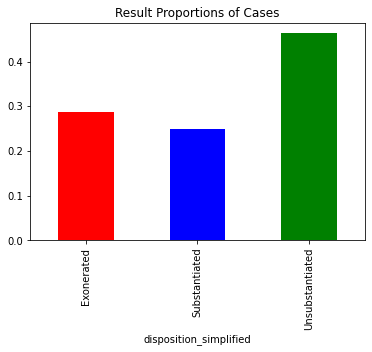

In [6]:
#Univariate Analysis
disposition_counts = complaints.groupby('disposition_simplified')['unique_mos_id'].count()

(disposition_counts/disposition_counts.sum()).plot(
    kind = 'bar', color = ['red', 'blue', 'green'],
    title = 'Result Proportions of Cases'
)


It seems that the majority of the conclusions of the complaints resulted in no action taken against the officer with unsubstantiated and exonerated making 75.115% of the conclusions. Only a small amount of the complaints result in the disciplining of the officer. The large proportion of unsubstantiated could be due to the uncooperation of the NYPD to provide evidence relating to the incident as stated in the readme file of the data.


In [7]:
#non-substantiated proportion of cases
(disposition_counts/disposition_counts.sum())[['Exonerated', 'Unsubstantiated']].sum()


0.7511541459320104

Comparing the average time the case was opened for the ethnicities of the complainants.

[Text(0, 0.5, 'time_open (days)'),
 Text(0.5, 1.0, 'Complaint Time Open By Ethnicity')]

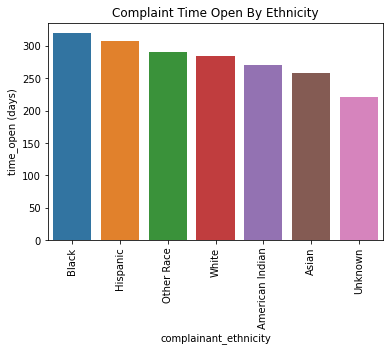

In [8]:
#Bivariate Analysis
ethnicity_time = (
    complaints[['complainant_ethnicity', 'time_open']]
    .replace(np.NaN, 'Unknown').groupby('complainant_ethnicity')
    .agg(lambda x: x.mean().days)
    .reset_index()
    .sort_values(by = 'time_open', ascending = False)
)

plt.xticks(rotation = 90)
(sns.barplot(x = ethnicity_time['complainant_ethnicity'], y = ethnicity_time['time_open'])
.set(ylabel = 'time_open (days)', title = 'Complaint Time Open By Ethnicity')
)


As seen in the graph above, there is some variation between the number of days a complaint remains open between the ethnicities of the complainant. Analyzing the proporition of cases that resulted in "substantiated" based on the complaintant's ethnicity. 

In [9]:
#Analyzed substantiated proportions based on race
total_ethnicity = complaints.groupby('complainant_ethnicity').count()['unique_mos_id']
exonerated_ethnicity = (complaints[complaints['disposition_simplified'] == 'Substantiated']
    .groupby('complainant_ethnicity')
    .count()['unique_mos_id'])

props_exonerated = (exonerated_ethnicity/total_ethnicity).sort_values(ascending = False)
props_exonerated


complainant_ethnicity
American Indian    0.359375
Asian              0.291353
White              0.279195
Other Race         0.268833
Hispanic           0.244707
Black              0.237992
Name: unique_mos_id, dtype: float64

Bar plot of the data found above.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'American Indian'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Other Race'),
  Text(4, 0, 'Hispanic'),
  Text(5, 0, 'Black')])

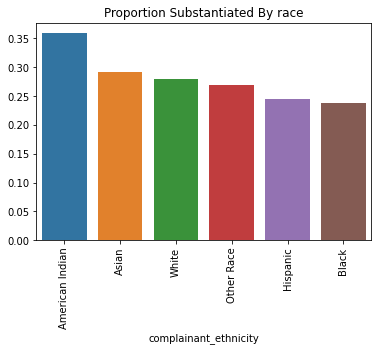

In [10]:
#Plot data
sns.barplot(x = props_exonerated.index, y = props_exonerated.values).set(title = 'Proportion Substantiated By race')
plt.xticks(rotation = 90)


## Assessment of Missingness

Complainant ethnicity, gender, and age make up the majority of the missing values in the dataset. This could be due to the complainant not wanting these values to affect the board disposition. For  example, some values like being of "black" ethnicity could cause the decision to be less in favor of the complainant due to racial bias, causing some complainants to not disclose their ethnicity. This would make the missingness of these columns not missing at random (NMAR). We used a permutation test and found tvd test statistics to show that these columns, mos_gender and complainant_ethnicity, are not dependent on one another.


p-value:  0.088


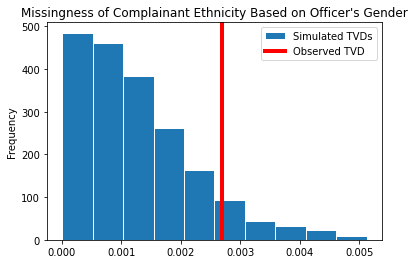

In [11]:

#Showing columns are dependent on each other
x = 'mos_gender'
y = 'complainant_ethnicity'
shuffled = complaints.copy()
shuffled['missing'] = shuffled[y].isna()
n_repetitions = 500
tvds = []
for _ in range(n_repetitions):

    # Shuffling gender and assigning back to the DataFrame
    shuffled[x] = np.random.permutation(shuffled[x])

    # Computing and storing TVD
    pivoted = (
        shuffled
        .pivot_table(index='missing', columns=x, aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )

    tvd = pivoted.diff().iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)
    
gender_dist = (
    shuffled
    .assign(ethnicity_missing=complaints[y].isna())
    .pivot_table(index=x, columns='missing', aggfunc='size')
)

gender_dist = gender_dist / gender_dist.sum()
gender_dist
obs_tvd = gender_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
pval = np.mean(np.array(tvds) > obs_tvd)
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title= "Missingness of Complainant Ethnicity Based on Officer's Gender", label="Simulated TVDs")
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();
print("p-value: ", pval)

Following the same steps as above, we used a permutation test and tvd test statistics to show data
is MAR.


p-value:  0.0


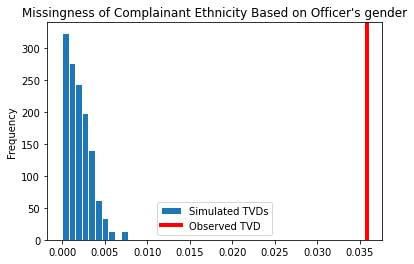

In [12]:
#MAR
x = 'allegation'
y = 'complainant_ethnicity'
shuffled_1 = complaints.copy()
shuffled_1['missing'] = shuffled[y].isna()
n_repetitions = 500
tvds = []
for _ in range(n_repetitions):

    # Shuffling allegations and assigning back to the DataFrame
    shuffled_1[x] = np.random.permutation(shuffled[x])

    # Computing and storing TVD
    pivoted = (
        shuffled_1
        .pivot_table(index='missing', columns=x, aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )

    tvd = pivoted.diff().iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)

gender_dist = (
    shuffled_1
    .assign(ethnicity_missing=complaints[y].isna())
    .pivot_table(index=x, columns='missing', aggfunc='size')
)

gender_dist = gender_dist / gender_dist.sum()
gender_dist
obs_tvd = gender_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
pval = np.mean(np.array(tvds) > obs_tvd)
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title= "Missingness of Complainant Ethnicity Based on Officer's gender", label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();
print("p-value: ", pval)

## Hypothesis Testing

The question we will be answering is:

*Are white officer vs. non-white complainant cases more likely to go
against the complainant?*

We will be conducting a permutation test to answer the question, shuffling ethnicity of complainant
and only looking at cases involving white officers.

- Test Statistic: Difference of Means

- Significance Level: 0.05

- Null Hypothesis: Mean Difference = 0

- Alternative Hypothesis: Mean Difference > 0

We chose a permutation test because it compares categorical values as required of this question. Using this test statistic, we are able to see the difference between the two groups we are comparing (white officer vs. non-white complainants and white officer vs. white complainant). The null describes the event where white officer vs non-white complainant cases are equally likely as white officer vs white complainant cases to result in a nonsubstantiated disposition. The alternative describes the event where white officer vs non-white complainant cases are more likely than white officer vs white complainant cases to result in a nonsubstantiated disposition. We view nonsubstantiated disposition (exonerated and unsubstantiated) as against the complainant as it does not work in their favor of disciplining the officer for conduct violations.

Generating the obeserved test statistic.


In [13]:
#observed test statistic
white_officer_vs_nonwhite_complainant = complaints[
 (complaints['mos_ethnicity'] == 'White') & (complaints['complainant_ethnicity'] != 'White')
]

against_nonwhite_prop = (
    (white_officer_vs_nonwhite_complainant['disposition_simplified'] != 'Substantiated').sum()
    /white_officer_vs_nonwhite_complainant.shape[0])

white_officer_vs_white_complainant = complaints[
 (complaints['mos_ethnicity'] == 'White') & (complaints['complainant_ethnicity'] == 'White')
]

against_white_prop = (
    (white_officer_vs_white_complainant['disposition_simplified'] != 'Substantiated').sum()
    /white_officer_vs_white_complainant.shape[0])

obs_diff = against_nonwhite_prop - against_white_prop
obs_diff


0.024571923494828285

Running the permutation test, shuffling complainants ethnicity(white vs. non-white) and finding a pvalue.


In [33]:
white_officers_only = complaints[complaints['mos_ethnicity'] == 'White'].reset_index()
white_officers_only['is_white'] = white_officers_only['complainant_ethnicity'] == 'White'
white_officers_only['against_complainant'] =white_officers_only['disposition_simplified']!='Substantiated'
shuffled = white_officers_only.copy()
n_repetitions = 500
differences = []
shuffled_is_white = (
        white_officers_only['is_white']
        .sample(frac=1)
        .reset_index(drop=True)
    )

    # Step 2: Put them in a DataFrame
shuffled['shuffled_is_white'] = shuffled_is_white
group_means = (
        shuffled
        .groupby('shuffled_is_white')['against_complainant']
        .mean()
    )
group_means

shuffled_is_white
False    0.757594
True     0.764420
Name: against_complainant, dtype: float64

In [34]:
#Permutation test
white_officers_only = complaints[complaints['mos_ethnicity'] == 'White'].reset_index()
white_officers_only['is_white'] = white_officers_only['complainant_ethnicity'] == 'White'
white_officers_only['against_complainant'] = white_officers_only['disposition_simplified'] != 'Substantiated'
shuffled = white_officers_only.copy()
n_repetitions = 500
differences = []
for _ in range(n_repetitions):

 # Step 1: Shuffle the complainants ethnicities
    shuffled_is_white = (
        white_officers_only['is_white']
        .sample(frac=1)
        .reset_index(drop=True)
    )

    # Step 2: Put them in a DataFrame
    shuffled['shuffled_is_white'] = shuffled_is_white

    # Step 3: Compute the test statistic
    group_means = (
        shuffled
        .groupby('shuffled_is_white')['against_complainant']
        .mean()
    )

    #print(group_means)
    difference = group_means.diff().iloc[-1]

    # Step 4: Store the result
    differences.append(difference)

pval = np.mean(np.array(differences) > obs_diff)
pval


0.012

Plotting the mean difference test statistics found above.

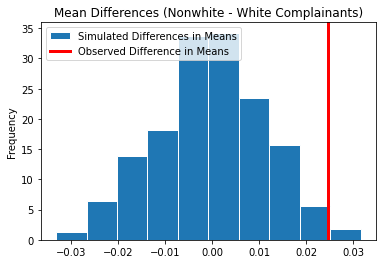

In [35]:
#Plot of Differences
title = 'Mean Differences (Nonwhite - White Complainants)'
pd.Series(differences).plot(kind='hist', density=True, ec='w', bins=10, title=title, label='Simulated Differences in Means')
plt.axvline(x=obs_diff, color='red', linewidth=3, label='Observed Difference in Means')
plt.legend();